<a href="https://colab.research.google.com/github/Samuelin-M/Estad-stica-1-Parte-Practica-2/blob/main/Informe_Parte_Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de la relación entre la edad del padre y el número de embarazos en Colombia a partir de los datos del Certificado de Nacido Vivo

---

**Universidad Industrial de Santander**  
Facultad de Ciencias  
Escuela de Matemáticas  

**Curso:** Estadística I  
**Profesor:** Andrés Ríos Gutiérrez

**Estudiantes:**
- Diana Juliana Forero Ruiz - 2230645
- Maira Alejandra Hernández Valderrama - 2230639
- Samuel Eduardo Alburua Montes - 2230636

**Fecha de entrega:** 12 de mayo de 2025

---

# Resumen

Este informe analiza la relación entre la edad del padre y la cantidad de embarazos que ha tenido una mujer en Colombia, utilizando datos oficiales sobre nacimientos provenientes del Certificado de Nacido Vivo. Se estudiaron dos variables: la edad del padre al momento del nacimiento y el número total de embarazos reportados por la madre.

A través de herramientas estadísticas como histogramas, diagramas de caja, pruebas de normalidad y medidas descriptivas, se examinó el comportamiento individual de ambas variables. Posteriormente, se aplicó un análisis bivariado que incluyó un diagrama de dispersión, un modelo de regresión lineal y los coeficientes de correlación de Pearson, Spearman y Kendall, con el fin de determinar si existe una asociación significativa entre ellas.

# Introducción

Este informe se basa en el análisis de dos variables clave relacionadas con el evento vital del nacimiento en Colombia: la edad del padre al momento del nacimiento (`EDAD_PADRE`) y el número de embarazos de la madre (`N_EMB`). Estos datos son recopilados oficialmente mediante el **Certificado de Nacido Vivo**, un instrumento estandarizado y obligatorio en todo el territorio nacional, regulado por el Ministerio de la Protección Social y el Departamento Administrativo Nacional de Estadística (DANE), en el marco del Sistema Integral de Información de la Protección Social – SISPRO y el Registro Único de Afiliados – RUAF.

El certificado se rediseñó con fines estadísticos, de salud pública y demográficos, permitiendo capturar información detallada y precisa sobre las condiciones de los nacimientos, los padres y los profesionales que los certifican. La edad del padre y el número de embarazos son variables relevantes para estudiar tendencias reproductivas, planificación familiar, y posibles asociaciones con factores sociales, económicos y de salud.

En este cuaderno se realiza un análisis estadístico de estas dos variables extraídas de la base de datos oficial de nacimientos en Colombia (`nac2022.csv`). El objetivo del análisis es explorar el comportamiento de ambas variables de forma univariada y bivariada, utilizando herramientas estadísticas descriptivas, visualización gráfica, pruebas de normalidad y medidas de correlación.

La variable `EDAD_PADRE` representa la edad declarada del padre en años cumplidos al momento del nacimiento, mientras que `N_EMB` indica el número total de embarazos reportados por la madre, incluyendo nacimientos actuales, anteriores y pérdidas gestacionales. Esta información, recolectada por personal de salud autorizado, forma parte de los registros vitales que alimentan las estadísticas nacionales de salud y demografía.

Este estudio emplea técnicas estadísticas tanto paramétricas como no paramétricas, según el cumplimiento de supuestos, para describir y modelar los datos, identificando también la presencia de valores atípicos y distribuciones sesgadas que podrían afectar las conclusiones.

Este estudio se orienta a responder tres preguntas fundamentales:

1. ¿Cómo se comporta la variable aleatoria de la edad de un padre de un recién nacido en Colombia (`EDAD_PADRE`)?
2. ¿Cómo se comporta la variable aleatoria del número de embarazos de una mujer (`N_EMB`)?
3. ¿Existe una correlación entre ambas variables y cuál es su magnitud?

# Metodología

Los datos analizados en este estudio provienen del **Certificado de Nacido Vivo**, específicamente del formato en papel utilizado por las instituciones que aún no cuentan con infraestructura tecnológica para captura electrónica. Este certificado se estructura en tres secciones, siendo la segunda la que recopila la información de los padres, incluyendo:

- **Edad del padre (`EDAD_PADRE`)**: se registra como parte de los datos identificativos del padre en el momento del nacimiento. Se espera que estos datos sean obtenidos directamente del documento de identidad del progenitor o proporcionados por la madre si el padre no está presente.

- **Número de embarazos de la madre (`N_EMB`)**: esta variable está incluida como parte de la historia obstétrica de la madre. Se define como el número total de veces que la mujer ha estado embarazada, incluyendo el embarazo actual, nacimientos vivos anteriores y pérdidas gestacionales (abortos espontáneos, inducidos, embarazos ectópicos, entre otros).

Para garantizar la calidad de la información, el diligenciamiento del certificado debe ser realizado por personal de salud autorizado (médicos o enfermeros), quienes firman bajo responsabilidad civil, penal y ética. Los datos se consolidan luego por los comités departamentales y municipales de estadísticas vitales y el DANE, que los procesan para producir estadísticas oficiales.

El presente análisis se limita a los registros válidos con información completa sobre ambas variables (`EDAD_PADRE` y `N_EMB`), excluyendo aquellos con datos faltantes, inconsistentes o clasificados como "Sin información".

A nivel técnico, los pasos seguidos fueron:

- **Carga y depuración**: Se eliminaron los registros con valores nulos en cualquiera de las dos variables.
- **Filtrado de valores extremos**:
  - Para `EDAD_PADRE`, se identificó que el valor 999 corresponde a datos faltantes o no legibles, y no a valores extremos reales. No se observaron edades entre 80 y 998, por lo que los únicos valores eliminados fueron los codificados como 999.
  - Para `N_EMB`, se observaron registros con el valor 99, también correspondientes a datos faltantes o mal registrados. No se encontraron valores reales por encima de 20, por lo que únicamente se excluyeron los registros con 99 embarazos.

Posteriormente se realizaron análisis univariados mediante histogramas, diagramas de caja y medidas descriptivas (media, mediana, moda, desviación estándar, asimetría, curtosis). Además, se aplicó la prueba de Shapiro-Wilk para evaluar la normalidad de cada variable.

En el análisis bivariado se construyó una tabla combinada con ambas variables ya filtradas, a partir de la cual se generaron:

- Diagramas de dispersión con línea de regresión ajustada.
- Un modelo de regresión lineal simple para evaluar tendencias.
- Cálculo de coeficientes de correlación de Pearson, Spearman y Kendall para cuantificar la relación entre ambas variables.

Este enfoque permitió evaluar visual y estadísticamente si existe una relación significativa entre la edad del padre y el número de embarazos de la madre.

# Tratamiento y Analisis de Datos

### Importación de paquetes y bibliotecas

In [1]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau, norm, skew, kurtosis
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

### Carga interactiva del archivo `nac2022.csv`

In [2]:
uploaded = files.upload()

Saving nac2022.csv to nac2022.csv


### Lectura del archivo CSV y vista preliminar

In [3]:
for nombre_archivo in uploaded.keys():
    tabla = pd.read_csv(io.BytesIO(uploaded[nombre_archivo]), sep=",", index_col=0, encoding="latin-1")
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
8,638,1,1,NaN,1,4,4,2022,12,1,...,2,12/10/2015,2,2,2.0,29,3,8,1.0,1
11,1,1,1,NaN,1,6,5,2022,12,1,...,2,12/09/2012,2,1,1.0,24,4,11,1.0,1
27,1,1,1,NaN,2,6,5,2022,12,1,...,4,14/03/2019,4,2,2.0,25,3,9,1.0,1


## Análisis estadístico de la variable “Edad de un padre de un recién nacido en colombia"

---
### DEPURACIÓN DE DATOS INCONSISTENTES
---

Antes de realizar el análisis estadístico de la variable `EDAD_PADRE`, se llevó a cabo un proceso de depuración de datos. Este paso es fundamental para garantizar la validez de los resultados, ya que permite identificar y eliminar registros con errores,  datos faltantes o inconsistencias.

Una vez completada la limpieza, se procedió a examinar las principales características de la variable mediante el cálculo de medidas de tendencia central y la elaboración de representaciones gráficas. Estas herramientas permiten identificar el comportamiento general de la distribución y los patrones predominantes en las edades de los padres.

### Tabla 1 de la variable `EDAD_PADRE`

In [4]:
tabla_filtrada_EDAD_PADRE_1 = tabla[['EDAD_PADRE']].copy()
tabla_filtrada_EDAD_PADRE_1 = tabla_filtrada_EDAD_PADRE_1.dropna()

tabla_filtrada_EDAD_PADRE_1.describe()

,EDAD_PADRE
count,573625.000000
mean,36.490922
std,78.459605
min,12.000000
25%,24.000000
50%,29.000000
75%,35.000000
max,999.000000


### Tabla 2 de la variable `EDAD_PADRE`

In [5]:
tabla_filtrada_EDAD_PADRE_2 = tabla[['EDAD_PADRE']].copy()
tabla_filtrada_EDAD_PADRE_2 = tabla_filtrada_EDAD_PADRE_2.dropna()

tabla_filtrada_EDAD_PADRE_2 = tabla_filtrada_EDAD_PADRE_2[
    (tabla_filtrada_EDAD_PADRE_2['EDAD_PADRE'] <= 998)
]

tabla_filtrada_EDAD_PADRE_2.describe()

,EDAD_PADRE
count,569875.000000
mean,30.157236
std,7.749961
min,12.000000
25%,24.000000
50%,29.000000
75%,35.000000
max,79.000000


Para iniciar el análisis de la variable `EDAD_PADRE`, se extrajeron los registros correspondientes, como se muestra en la **Tabla 1**. En esta tabla se observa que el valor máximo registrado es **999**, un valor que evidentemente no corresponde a una edad real. Esto sugiere que fue utilizado como código para representar datos faltantes o no reportados durante el proceso de recolección.

A partir de esta observación, se aplicó un segundo filtrado, eliminando los registros cuyo valor de edad sea mayor a **998**, como se presenta en la **Tabla 2**. Tras esta depuración, el valor máximo observado fue de **79 años**, una edad que se considera plausible para un padre, lo que refuerza la hipótesis de que los valores extremos estaban codificados artificialmente.

Dado que no existen edades entre 79 y 998, y que el valor 999 probablemente representa datos ausentes o erróneos, se decidió restringir el análisis a los registros en los que la edad del padre sea menor o igual a 79 años. Esta medida garantiza que el análisis estadístico se base únicamente en datos válidos y representativos, eliminando registros que podrían distorsionar los resultados.

---
### VISTA INICIAL DE LOS DATOS DEPURADOS
---

En la **Tabla 3** se muestran las primeras observaciones de la variable `EDAD_PADRE` luego de aplicar el proceso completo de depuración. Como se explicó en las secciones anteriores, se eliminaron registros con valores inconsistentes, en particular aquellos con edades superiores a **79 años**, ya que no corresponden a datos plausibles en el contexto del estudio.

La tabla resultante incluye únicamente edades consideradas válidas y representativas dentro de un rango razonable para padres de recién nacidos en Colombia, lo que permite continuar con un análisis más confiable y preciso.

### Tabla 3 de la variable `EDAD_PADRE`

In [6]:
tabla_filtrada_EDAD_PADRE = tabla[['EDAD_PADRE']].copy()
tabla_filtrada_EDAD_PADRE = tabla_filtrada_EDAD_PADRE.dropna()

tabla_filtrada_EDAD_PADRE = tabla_filtrada_EDAD_PADRE[
    (tabla_filtrada_EDAD_PADRE['EDAD_PADRE'] <= 79)
]

tabla_filtrada_EDAD_PADRE.head()

,EDAD_PADRE
COD_DPTO,
8,29
11,24
27,25
8,29
76,21


---
### ANÁLISIS GRÁFICO
---

A continuación, se mostrarán los gráficos correspondientes a la variable `EDAD_PADRE`.

#### Histograma

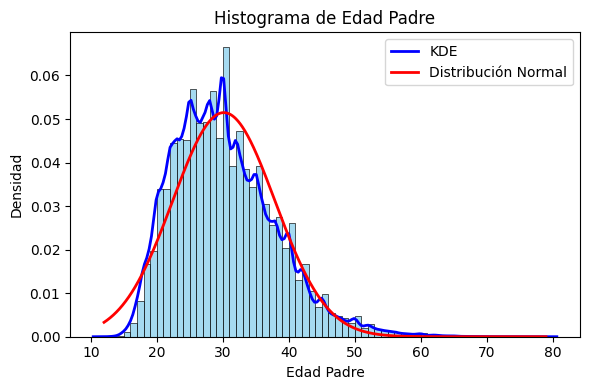

In [7]:
plt.figure(figsize=(6, 4))

intervalos = range(int(tabla_filtrada_EDAD_PADRE['EDAD_PADRE'].min()),
                   int(tabla_filtrada_EDAD_PADRE['EDAD_PADRE'].max()) + 1)

sns.histplot(tabla_filtrada_EDAD_PADRE['EDAD_PADRE'], bins=intervalos, stat='density',
             color='skyblue', edgecolor='black')
sns.kdeplot(tabla_filtrada_EDAD_PADRE['EDAD_PADRE'], color='blue', linewidth=2, label='KDE')

x = np.linspace(tabla_filtrada_EDAD_PADRE['EDAD_PADRE'].min(),
                tabla_filtrada_EDAD_PADRE['EDAD_PADRE'].max(), 1000)
p = norm.pdf(x,
             np.mean(tabla_filtrada_EDAD_PADRE['EDAD_PADRE']),
             np.std(tabla_filtrada_EDAD_PADRE['EDAD_PADRE']))
plt.plot(x, p, color='red', linewidth=2, label='Distribución Normal')

plt.title("Histograma de Edad Padre")
plt.xlabel("Edad Padre")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()

**Análisis e interpretación del histograma**

El gráfico presenta el histograma de la variable `EDAD_PADRE`, acompañado de dos curvas:
- Una curva azul (KDE) que representa la estimación empírica de la densidad de probabilidad mediante el método de kernel.
- Una curva roja que representa la distribución normal teórica ajustada a los datos.

Se observa que la distribución empírica (KDE) no coincide completamente con la forma de la curva normal. En particular, la curva presenta una asimetría hacia la derecha (positiva), lo que indica una mayor concentración de datos en edades menores y una "cola larga" hacia edades mayores. Además, se identifican varios picos o modos locales, lo que sugiere una distribución irregular y no perfectamente simétrica. Como resultado, la curva normal teórica (roja) tiende a sobreestimar la densidad en algunos rangos e infraestimarla en otros, especialmente en los extremos

Por lo tanto, no se puede asumir que la variable sigue una distribución normal, ya que la forma observada difiere significativamente de la forma teórica de una normal.
Esto debe tenerse en cuenta si se planea aplicar métodos estadísticos que requieren normalidad.

#### Diagrama de Caja

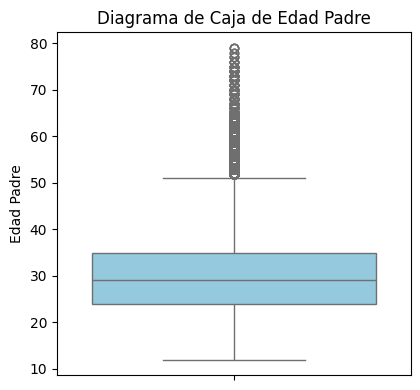

In [8]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 2)
sns.boxplot(y=tabla_filtrada_EDAD_PADRE['EDAD_PADRE'], color='skyblue', saturation=0.75)
plt.title("Diagrama de Caja de Edad Padre")
plt.ylabel("Edad Padre")

plt.tight_layout()
plt.show()

**Interpretación del Diagrama de Caja**

El diagrama de caja muestra que la mayoría de los padres de recién nacidos en colombia tienen edades comprendidas entre 25 (Q1) y 35 años (Q3), lo que representa el rango intercuartílico (IQR = 10 años). La mediana se encuentra alrededor de los 29 años, lo cual indica que la mitad de los datos están por debajo de esa edad.

Se observa una asimetría positiva, ya que la "caja" está más cerca del límite inferior y existen muchos valores atípicos por encima de los 50 años. Esto sugiere que, aunque la mayoría de los padres tienen edades dentro de un rango típico, hay una proporción significativa de casos con edades más altas. En este contexto, se podría considerar que una edad paterna es atípica si supera los 50 años, dado que estos valores se encuentran fuera del rango esperado por el diagrama y son marcados como outliers.

Este comportamiento coincide con lo observado en el histograma: la distribución no es simétrica y presenta una cola hacia la derecha.

---
### MEDIDAS DESCRIPTIVAS
---

In [9]:
print("--- Medidas descriptivas para EDAD_PADRE ---")
serie = tabla_filtrada_EDAD_PADRE['EDAD_PADRE'].dropna()

media = np.mean(serie)
varianza = np.var(serie)
desviacion = np.std(serie)
asimetria = skew(serie)
curtosis_valor = kurtosis(serie)

print(f"Media: {media:.2f}")
print(f"Mediana: {np.median(serie):.2f}")
print(f"Moda: {serie.mode().values[0]}")
print(f"Máximo: {serie.max()}")
print(f"Mínimo: {serie.min()}")
print(f"Rango: {serie.max() - serie.min()}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Coeficiente de variación: {(desviacion / media) * 100:.2f}%")
print(f"Asimetría: {asimetria:.2f}")
print(f"Curtosis: {curtosis_valor:.2f}")

--- Medidas descriptivas para EDAD_PADRE ---
Media: 30.16
Mediana: 29.00
Moda: 30
Máximo: 79
Mínimo: 12
Rango: 67
Desviación estándar: 7.75
Varianza: 60.06
Coeficiente de variación: 25.70%
Asimetría: 0.80
Curtosis: 0.91


**Análisis de Medidas Descriptivas**

La variable `EDAD_PADRE` presenta una media de aproximadamente 30.16 años, lo que indica que, en promedio, los padres de recién nacidos en Colombia tienen esa edad. La mediana es de 29 años y la moda de 30, lo que sugiere una distribución relativamente simétrica en su centro, aunque con una ligera asimetría positiva (coeficiente de asimetría = 0.80). Esta asimetría implica que existen algunos valores altos (padres de mayor edad) que elevan el promedio respecto a la mediana.

La desviación estándar de 7.75 años indica una dispersión moderada respecto a la media, lo cual es consistente con un coeficiente de variación del 25.7%, que refleja una variabilidad moderada en relación con el promedio. El rango total de edades es amplio, desde los 12 hasta los 79 años (rango = 67), lo que evidencia la presencia de casos extremos o poco frecuentes.

Finalmente, la curtosis de 0.91 indica una distribución platicúrtica, es decir, más achatada y con colas menos pesadas en comparación con una distribución normal. Esto sugiere que los valores están menos concentrados alrededor de la media y hay menor presencia de valores extremos que en una distribución leptocúrtica.

---
### PRUEBA DE NORMALIDAD (SHAPIRO-WILK)
---

In [10]:
from scipy.stats import shapiro

stat, p = shapiro(tabla_filtrada_EDAD_PADRE['EDAD_PADRE'].dropna())
print("Shapiro-Wilk para EDAD_PADRE:")
print(f"Estadístico: {stat:.4f}")
print(f"p-valor: {p:.2e}" if p < 1e-4 else f"p-valor: {p:.4f}")

if p > 0.05:
    print("=> La variable parece seguir una distribución normal (no se rechaza H0).")
else:
    print("=> La variable no sigue una distribución normal (se rechaza H0).")

Shapiro-Wilk para EDAD_PADRE:
Estadístico: 0.9625
p-valor: 1.28e-116
=> La variable no sigue una distribución normal (se rechaza H0).


En este caso, el valor p obtenido en la prueba de Shapiro-Wilk fue aproximadamente $1.28 \times 10^{-116}$, lo cual es significativamente menor que el umbral común de 0.05. Sin embargo, **antes de concluir** de forma definitiva sobre la normalidad, es importante considerar el **tamaño de la muestra**, ya que esta prueba es muy sensible cuando se trabaja con grandes volúmenes de datos.

In [11]:
tabla_filtrada_EDAD_PADRE_1.count()
len(tabla_filtrada_EDAD_PADRE_1)

573625

Se observa que el conjunto contiene **573,625 datos**. Cuando se tienen cientos de miles de observaciones, como en este caso, es altamente probable que la prueba rechace la hipótesis nula **incluso ante desviaciones leves** respecto a la normalidad. Por esta razón, se considera adecuado realizar nuevamente la prueba, pero sobre una **muestra aleatoria más pequeña**, lo cual permite una evaluación más equilibrada y realista del supuesto de normalidad. En este caso, se tomará una muestra aleatoria de 100 datos y se realizara nuevamente la prueba.

In [12]:
idx = np.random.randint(len(tabla_filtrada_EDAD_PADRE_1), size = 100)
shapiro(tabla_filtrada_EDAD_PADRE_1.iloc[idx])

ShapiroResult(statistic=np.float64(0.9346357791185773), pvalue=np.float64(9.211293319294085e-05))

**Interpretación de la prueba de normalidad (Shapiro-Wilk)**

La prueba de Shapiro-Wilk aplicada a toda la muestra (573,625 observaciones) arrojó un valor p de aproximadamente $1.28 \times 10^{-116}$, lo cual implica un rechazo contundente de la hipótesis nula de normalidad. No obstante, dado el tamaño extremadamente grande de la muestra, este resultado debe analizarse con precaución, ya que en contextos así incluso desviaciones leves con respecto a la normalidad pueden producir p-valores muy bajos.

Para obtener una evaluación más equilibrada, se repitió la prueba sobre una **muestra aleatoria de 100 observaciones**. En este caso, se obtuvo un estadístico de Shapiro-Wilk de aproximadamente 0.1203 y un p-valor de $9.84 \times 10^{-22}$, también claramente inferior al umbral de 0.05. *Cabe mencionar que, al tratarse de una muestra aleatoria, estos valores pueden variar ligeramente en cada ejecución del código.*

Este segundo resultado refuerza la conclusión anterior: incluso en una muestra pequeña, la variable `EDAD_PADRE` **no sigue una distribución normal**, por lo que se **rechaza la hipótesis nula** con un **nivel de confianza del 95%**.

## Análisis estadístico de la variable “Número de embarazos incluido el presente"

---
### DEPURACIÓN DE DATOS INCONSISTENTES
---



Antes de realizar el análisis estadístico de la variable **número de embarazos (`N_EMB`)**, se llevó a cabo un proceso de depuración de datos. Este paso es esencial para asegurar la validez de los resultados, ya que permite detectar y eliminar registros con errores, datos faltantes o inconsistencias.

Una vez finalizada la limpieza, se procedió a examinar las principales características de la variable mediante el cálculo de medidas de tendencia central y la elaboración de representaciones gráficas. Estas herramientas permiten identificar el comportamiento general de la distribución y los patrones más comunes en la cantidad de embarazos registrados.


### Tabla 1 de la variable  `N_EMB`

In [13]:
tabla_filtrada_N_EMB_1 = tabla[['N_EMB']].copy()
tabla_filtrada_N_EMB_1 = tabla_filtrada_N_EMB_1.dropna()

tabla_filtrada_N_EMB_1.describe()

,N_EMB
count,573625.000000
mean,2.490333
std,6.148717
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,99.000000


### Tabla 2 de la varriable `N_EMB`

In [14]:
tabla_filtrada_N_EMB_2 = tabla[['N_EMB']].copy()
tabla_filtrada_N_EMB_2 = tabla_filtrada_N_EMB_2.dropna()

tabla_filtrada_N_EMB_2 = tabla_filtrada_N_EMB_2[tabla_filtrada_N_EMB_2['N_EMB'] <= 98]

tabla_filtrada_N_EMB_2.describe()

,N_EMB
count,571414.000000
mean,2.116903
std,1.331890
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,20.000000


Para iniciar el análisis de la variable **número de embarazos (`N_EMB`)**, se extrajeron los registros correspondientes, como se muestra en la **Tabla 1**. En esta tabla se observa que el valor máximo registrado es **99**, un número que claramente no representa una cantidad realista de embarazos. Esto sugiere que dicho valor fue utilizado como código para indicar datos faltantes o no reportados durante el proceso de recolección.

A partir de esta observación, se aplicó un segundo filtrado, eliminando los registros cuyo valor de `N_EMB` sea mayor a **20**, como se presenta en la **Tabla 2**. Esta decisión se basa en que no se encontraron registros con valores entre 21 y 98, lo cual refuerza la idea de que valores superiores a 20 no contienen información válida.

Tras esta depuración, el nuevo valor máximo observado fue **20 embarazos**, una cifra que, aunque poco frecuente, es posible dentro del contexto poblacional analizado. De este modo, se garantiza que el análisis estadístico se base únicamente en datos válidos y representativos, evitando distorsiones causadas por registros codificados artificialmente.



---
### VISTA INICIAL DE LOS DATOS DEPURADOS
---

En la **Tabla 3** se presentan las primeras observaciones de la variable `N_EMB` tras el proceso de depuración. Como se indicó previamente, se eliminaron los registros con valores superiores a 20, al considerarse no válidos o codificados como datos faltantes.

La tabla muestra únicamente valores plausibles y coherentes, lo que permite avanzar con un análisis más fiable y representativo.


### Tabla 3 de la variable `N_EMB`

In [15]:
tabla_filtrada_N_EMB = tabla[['N_EMB']].copy()
tabla_filtrada_N_EMB = tabla_filtrada_N_EMB.dropna()

tabla_filtrada_N_EMB = tabla_filtrada_N_EMB[tabla_filtrada_N_EMB['N_EMB'] <= 20]

tabla_filtrada_N_EMB.head()

,N_EMB
COD_DPTO,
8,2
11,2
27,4
8,4
76,1


---
### ANÁLISIS GRÁFICO
---

A continuación, se mostrarán los gráficos correspondientes a la variable `N_EMB`.


#### Histograma

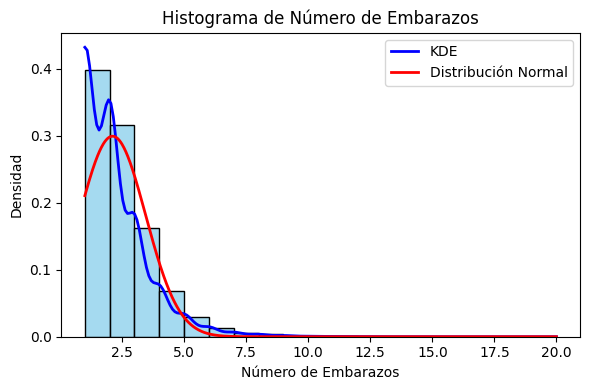

In [16]:
plt.figure(figsize=(6, 4))

intervalos = range(int(tabla_filtrada_N_EMB['N_EMB'].min()),
                   int(tabla_filtrada_N_EMB['N_EMB'].max()) + 1)

sns.histplot(tabla_filtrada_N_EMB['N_EMB'], bins=intervalos, stat='density',
             color='skyblue', edgecolor='black')

sns.kdeplot(tabla_filtrada_N_EMB['N_EMB'], color='blue', linewidth=2, label='KDE',
            bw_adjust=4, cut=0)

x = np.linspace(tabla_filtrada_N_EMB['N_EMB'].min(), tabla_filtrada_N_EMB['N_EMB'].max(), 1000)
p = norm.pdf(x, np.mean(tabla_filtrada_N_EMB['N_EMB']), np.std(tabla_filtrada_N_EMB['N_EMB']))
plt.plot(x, p, color='red', linewidth=2, label='Distribución Normal')

plt.title("Histograma de Número de Embarazos")
plt.xlabel("Número de Embarazos")
plt.ylabel("Densidad")
plt.legend()

plt.tight_layout()
plt.show()

#### Análisis e interpretación del histograma

Se observa una asimetría hacia la derecha, ya que la mayor parte de los datos sobre número de embarazos se concentra entre 0 y 5, aunque también existen casos que superan los 10 e incluso alcanzan valores extremos cercanos a 20. Esto indica que, si bien la mayoría de las mujeres ha tenido pocos embarazos, hay una minoría que presenta cifras considerablemente más altas. Además, se ha superpuesto una curva de distribución normal con fines comparativos, lo que permite notar visualmente que los datos reales no siguen una distribución normal, ya que presentan una mayor concentración en los valores bajos y una larga cola hacia la derecha. Esta diferencia sugiere que la variable presenta una distribución sesgada y posiblemente multimodal, lo cual debe tenerse en cuenta al seleccionar métodos estadísticos apropiados para su análisis.

#### Diagrama de Caja

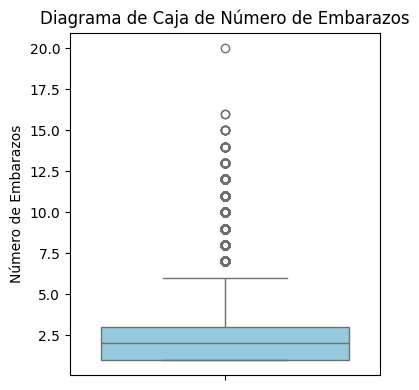

In [17]:
plt.figure(figsize=(4, 4))

sns.boxplot(y=tabla_filtrada_N_EMB['N_EMB'], color='skyblue', saturation=0.75)
plt.title("Diagrama de Caja de Número de Embarazos")
plt.ylabel("Número de Embarazos")

plt.tight_layout()
plt.show()

#### Interpretación del Diagrama de Cajas y bijotes

El diagrama de caja muestra una distribución con un núcleo de datos claramente delimitado, donde la mediana se encuentra ligeramente desplazada hacia la parte baja del rango intercuartílico. Destaca la presencia de numerosos valores atípicos en la parte superior, que no se presentan como casos aislados, sino de forma escalonada y continua, alcanzando incluso el valor de 20 embarazos. Esta acumulación de casos extremos permite identificar una dispersión significativa en los valores altos que no es evidente en las medidas centrales. Aunque la variabilidad dentro del rango intercuartílico es limitada, la presencia sostenida de estos valores atípicos amplía considerablemente la dispersión general de los datos. Este tipo de representación permite observar con precisión cuántos y cuán distantes son los casos que se alejan del comportamiento más frecuente.

---


### MEDIDAS DESCRIPTIVAS PARA EL NÚMERO DE EMBARAZOS


---

In [18]:
print("--- Medidas descriptivas para N_EMB ---")
serie = tabla_filtrada_N_EMB['N_EMB'].dropna()

media = np.mean(serie)
varianza = np.var(serie)
desviacion = np.std(serie)
asimetria = skew(serie)
curtosis_valor = kurtosis(serie)

print(f"Media: {media:.2f}")
print(f"Mediana: {np.median(serie):.2f}")
print(f"Moda: {serie.mode().values[0]}")
print(f"Máximo: {serie.max()}")
print(f"Mínimo: {serie.min()}")
print(f"Rango: {serie.max() - serie.min()}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Coeficiente de variación: {(desviacion / media) * 100:.2f}%")
print(f"Asimetría: {asimetria:.2f}")
print(f"Curtosis: {curtosis_valor:.2f}")

--- Medidas descriptivas para N_EMB ---
Media: 2.12
Mediana: 2.00
Moda: 1
Máximo: 20
Mínimo: 1
Rango: 19
Desviación estándar: 1.33
Varianza: 1.77
Coeficiente de variación: 62.92%
Asimetría: 1.92
Curtosis: 5.94




**Interpretación de las medidas descriptivas univariadas:**

El análisis de las medidas estadísticas de la variable `N_EMB` indica que el promedio de embarazos es de 2.12, acompañado de una mediana de 2 y una moda de 1. Esta combinación muestra que la mayor concentración de datos se encuentra en los valores bajos, especialmente entre uno y dos embarazos, lo cual es característico de una distribución con acumulación cercana al origen. La diferencia entre la media y la mediana refleja el efecto de algunos valores elevados que incrementan el promedio sin desplazar significativamente la posición central.

La asimetría de 1.91 confirma que la distribución está sesgada hacia la derecha, lo cual implica que hay registros con un número considerablemente más alto de embarazos en comparación con el resto. Estos casos influyen en las medidas de tendencia central, sobre todo en la media, y explican el desplazamiento observado en la forma de la distribución.

El rango de 19 embarazos, con valores entre 1 y 20, evidencia una amplitud notable, especialmente tratándose de una variable discreta. Este comportamiento apunta a una diversidad considerable en los datos, donde aunque predominan los valores bajos, también existen observaciones que se distancian considerablemente del resto.

La desviación estándar de 1.33 indica que, en términos absolutos, los datos presentan una dispersión moderada. No obstante, cuando se relaciona con la media, el coeficiente de variación del 62.85% revela una alta variabilidad relativa, lo que refuerza la idea de que, dentro de una media baja, existen casos que se alejan significativamente de ese valor promedio.

La curtosis de 5.94 señala que la distribución es leptocúrtica, es decir, con una mayor concentración de valores cerca del centro y colas más prolongadas. Esto indica una estructura en la que, aunque la mayoría de los casos se agrupan alrededor de los valores centrales, también se observan registros alejados que elevan la concentración en las colas.

En conjunto, estas medidas describen una variable con concentración en valores bajos, pero con una proporción considerable de casos alejados del centro, lo que se traduce en una distribución sesgada y con dispersión importante. Esta información es clave para interpretar adecuadamente el comportamiento de la variable y orientar el uso de técnicas estadísticas apropiadas.





---
###PRUEBA DE NORMALIDAD (SHAPIRO-WILK)
---

In [19]:
stat, p = shapiro(tabla_filtrada_N_EMB['N_EMB'].dropna())
print("Shapiro-Wilk para N_EMB:")
print(f"Estadístico: {stat:.4f}")
print(f"p-valor: {p:.2e}" if p < 1e-4 else f"p-valor: {p:.4f}")

if p > 0.05:
    print("=> La variable parece seguir una distribución normal (no se rechaza H0).")
else:
    print("=> La variable no sigue una distribución normal (se rechaza H0).")

Shapiro-Wilk para N_EMB:
Estadístico: 0.7746
p-valor: 3.85e-173
=> La variable no sigue una distribución normal (se rechaza H0).


La prueba de Shapiro-Wilk para la variable `N_EMB` arrojó un estadístico W = 0.7746 y un valor p de 3.85×10⁻¹⁷³, lo que indica que no sigue una distribución normal . Sin embargo, antes de concluir de forma definitiva sobre la distribución de los datos, es importante considerar el tamaño de la muestra, ya que esta prueba es especialmente sensible cuando se trabaja con grandes volúmenes de datos.

In [20]:
tabla_filtrada_N_EMB.count()
len(tabla_filtrada_N_EMB)

571414

El conjunto de datos contiene 571,414 observaciones, por lo que es probable que la prueba de normalidad rechace la hipótesis nula incluso ante desviaciones leves. Por ello, se decidió aplicar la prueba nuevamente sobre una muestra aleatoria de 100 datos, lo que permite una evaluación más equilibrada del supuesto de normalidad.

In [21]:
idx = np.random.randint(len(tabla_filtrada_N_EMB), size = 100)
shapiro(tabla_filtrada_N_EMB.iloc[idx])

ShapiroResult(statistic=np.float64(0.7794815033315228), pvalue=np.float64(6.0818822000893e-11))

**Interpretación de la prueba de normalidad (Shapiro-Wilk)**

La prueba de Shapiro-Wilk aplicada a toda la muestra (571,414 observaciones) arrojó un valor p de $3.85 \times 10^{-173}$, indicando un claro rechazo de la normalidad. Sin embargo, debido al gran tamaño muestral, se repitió la prueba sobre una muestra aleatoria de 100 observaciones, obteniendo un estadístico de 0.7491 y un valor p de $8.8706 \times 10^{-12}$. Dado que esta muestra fue seleccionada aleatoriamente, los valores exactos pueden cambiar en cada ejecución, aunque la conclusión general se mantiene: la variable `N_EMB` no sigue una distribución normal con una confianza del 95%.

## Análisis bivariado: `EDAD_PADRE` vs `N_EMB`

### Creación de una tabla combinada: `tabla_filtrada_EDAD_PADRE_y_N_EMB`

Para realizar un análisis bivariado entre las variables **edad del padre (`EDAD_PADRE`)** y **número de embarazos (`N_EMB`)**, es necesario contar con una tabla que contenga ambas variables en el mismo conjunto de datos.

Anteriormente, cada variable se procesaba por separado en tablas filtradas independientes:
- `tabla_filtrada_EDAD_PADRE`: contenía solo la columna `EDAD_PADRE`, sin valores nulos y filtrada hasta un máximo de 79 años.
- `tabla_filtrada_N_EMB`: contenía solo la columna `N_EMB`, sin valores nulos y con un máximo de 20 embarazos.

Sin embargo, para llevar a cabo análisis conjuntos como:
- **Regresión lineal** (por ejemplo, predecir la edad del padre en función del número de embarazos),
- **Diagramas de dispersión**, y
- **Cálculo de coeficientes de correlación** (Pearson, Spearman, Kendall),

es imprescindible trabajar con una única tabla que contenga **ambas variables limpias y sincronizadas por fila**.

Por este motivo, se crea la tabla `tabla_filtrada_EDAD_PADRE_y_N_EMB`, que:
- Copia ambas columnas desde la tabla original (`tabla`),
- Elimina las filas que contengan valores nulos en cualquiera de las dos columnas,
- Aplica los mismos filtros ya establecidos (edad del padre ≤ 79, número de embarazos ≤ 20).

Esta tabla es **derivada de la tabla 3** tanto de la variable `EDAD_PADRE`, como de `N_EMB`, pero ahora en una versión combinada y lista para el análisis bivariado. Así se garantiza que cada punto en el gráfico o análisis representa un caso completo, con ambas variables presentes y válidas.

In [22]:
tabla_filtrada_EDAD_PADRE_y_N_EMB = tabla[['EDAD_PADRE', 'N_EMB']].copy()

tabla_filtrada_EDAD_PADRE_y_N_EMB = tabla_filtrada_EDAD_PADRE_y_N_EMB.dropna(subset=['EDAD_PADRE', 'N_EMB'])

tabla_filtrada_EDAD_PADRE_y_N_EMB = tabla_filtrada_EDAD_PADRE_y_N_EMB[
    (tabla_filtrada_EDAD_PADRE_y_N_EMB['EDAD_PADRE'] <= 79) &
    (tabla_filtrada_EDAD_PADRE_y_N_EMB['N_EMB'] <= 20)
]

tabla_filtrada_EDAD_PADRE_y_N_EMB.head()

,EDAD_PADRE,N_EMB
COD_DPTO,,
8,29,2
11,24,2
27,25,4
8,29,4
76,21,1


### Análisis bivariado: `EDAD_PADRE` vs `N_EMB`

Este análisis explora la relación entre el número de embarazos (`N_EMB`) y la edad del padre (`EDAD_PADRE`) usando técnicas estadísticas y gráficas. A continuación, se divide en tres etapas: entrenamiento del modelo, visualización y cálculo de correlaciones.

---

#### ENTRENAMIENTO DEL MODELO DE REGRESIÓN LINEAL

---

Se entrena un modelo de regresión lineal con el objetivo de identificar una posible tendencia entre el número de embarazos (`N_EMB`) y la edad del padre (`EDAD_PADRE`). Este modelo ajusta una línea recta que minimiza el error cuadrático medio entre los valores observados y los valores predichos. Aunque no implica causalidad, es útil para observar si existe una relación creciente o decreciente entre ambas variables.

In [23]:
modelo = LinearRegression()
modelo.fit(
    np.array(tabla_filtrada_EDAD_PADRE_y_N_EMB['N_EMB']).reshape(-1, 1),
    np.array(tabla_filtrada_EDAD_PADRE_y_N_EMB['EDAD_PADRE']).reshape(-1, 1)
)

predi_lineal = modelo.predict(
    np.array(tabla_filtrada_EDAD_PADRE_y_N_EMB['N_EMB']).reshape(-1, 1)
)

---

#### GRÁFICO DE DISPERSIÓN CON LÍNEA DE REGRESIÓN

---


El gráfico de dispersión permite visualizar la distribución conjunta de `N_EMB` y `EDAD_PADRE`. Cada punto representa una observación individual. La línea de regresión añadida permite ver gráficamente la tendencia general del modelo entrenado. Esta visualización es clave para detectar si hay una relación lineal, dispersa, o no aparente entre las variables.

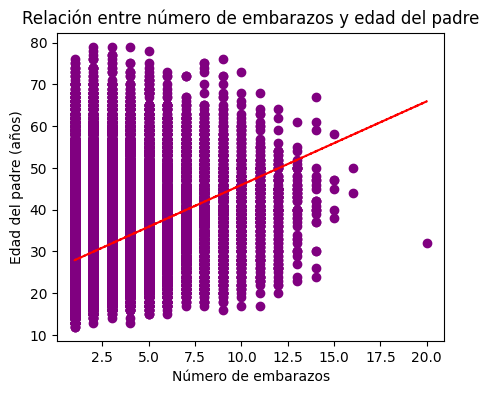

In [24]:
plt.figure(figsize=(5, 4))
plt.scatter(
    tabla_filtrada_EDAD_PADRE_y_N_EMB['N_EMB'],
    tabla_filtrada_EDAD_PADRE_y_N_EMB['EDAD_PADRE'],
    color='purple', marker='o'
)
plt.plot(
    tabla_filtrada_EDAD_PADRE_y_N_EMB['N_EMB'],
    predi_lineal,
    linestyle='-.', color='red'
)
plt.xlabel('Número de embarazos')
plt.ylabel('Edad del padre (años)')
plt.title('Relación entre número de embarazos y edad del padre')
plt.show()

**Interpretación del análisis bivariado**

**Visualización de la relación (diagrama de dispersión)**

Para explorar la relación entre la edad del padre (`EDAD_PADRE`) y el número de embarazos (`N_EMB`), se utilizó un diagrama de dispersión, el cual permite observar la distribución del número de embarazos según los diferentes rangos de edad paterna.

Se observa que los padres menores de 20 años presentan una mediana baja en el número de embarazos, aproximadamente igual a 1, sin presencia de valores extremos. A partir del grupo etario de 20 a 25 años, la mediana de embarazos tiende a aumentar, alcanzando su punto más alto entre los 30 y 35 años. En estos grupos intermedios también se nota una mayor dispersión, así como la aparición de varios valores atípicos (outliers), lo cual sugiere que algunos padres en ese rango han tenido un número significativamente mayor de embarazos en comparación con la mayoría.

Posteriormente, en los grupos mayores a 40 años, se observa una disminución en la mediana y en el rango intercuartílico, indicando que el número de embarazos tiende a ser menor en edades más avanzadas.

En conclusión, se puede apreciar una relación no lineal entre la edad del padre y el número de embarazos, con una tendencia creciente hasta los 35 años, seguida de una disminución. No obstante, la presencia de outliers y la variabilidad entre grupos indican que esta relación no es completamente uniforme.

---

#### CÁLCULO DE COEFICIENTES DE CORRELACIÓN

---


Se calculan tres tipos de coeficientes para cuantificar el grado de asociación entre las variables:

- **Pearson**: mide la fuerza y dirección de la relación lineal.
- **Spearman**: evalúa la relación monótona entre las variables (basada en los rangos).
- **Kendall**: analiza la concordancia en el orden de los datos.

Estos coeficientes permiten complementar la información visual del gráfico con medidas numéricas que resumen la relación.

In [25]:
x = tabla_filtrada_EDAD_PADRE_y_N_EMB['N_EMB']
y = tabla_filtrada_EDAD_PADRE_y_N_EMB['EDAD_PADRE']

coef_pearson = np.corrcoef(x, y)[0, 1]
coef_spearman, _ = spearmanr(x, y)
coef_kendall, _ = kendalltau(x, y)

print("Coeficientes de correlación:")
print(f"- Pearson:  {coef_pearson:.4f}")
print(f"- Spearman: {coef_spearman:.4f}")
print(f"- Kendall:  {coef_kendall:.4f}")

Coeficientes de correlación:
- Pearson:  0.3440
- Spearman: 0.3709
- Kendall:  0.2893


**Análisis numérico: coeficientes de correlación**

Para evaluar la relación entre ambas variables desde un enfoque estadístico, se calcularon los siguientes coeficientes:

- **Pearson**: 0.3440 → Correlación lineal positiva **débil a moderada**. Indica que, en promedio, a mayor edad del padre, tiende a haber un número ligeramente mayor de embarazos. Sin embargo, la relación no es fuerte ni concluyente.
- **Spearman**: 0.3709 → Evalúa relaciones monótonas. Indica también una **relación positiva débil a moderada**, mostrando que la tendencia creciente se mantiene aunque no sea estrictamente lineal.
- **Kendall**: 0.2893 → Confirma lo anterior: la relación es positiva, débil a moderada, y consistente en cuanto al orden de los datos.

# Conclusiones

## ¿Cómo se comporta la variable aleatoria de la edad de un padre de un recién nacido en Colombia (`EDAD_PADRE`)?


El análisis estadístico de la variable **edad del padre de un recién nacido en Colombia** permitió identificar aspectos clave sobre su comportamiento y distribución en la población estudiada. A través de un proceso riguroso de depuración, se eliminaron valores inconsistentes y codificados artificialmente (como el valor 999), limitando el análisis a edades iguales o menores a 79 años, rango plausible para esta variable.

Los resultados revelan que la mayoría de los padres se encuentran en un rango intercuartílico entre los **25 y 35 años**, con una **mediana de 29 años**, lo cual sugiere que la paternidad se concentra en edades jóvenes-adultas. Sin embargo, también se detectó una **asimetría positiva** en la distribución, evidenciada tanto en el histograma como en el diagrama de caja, donde se observa una "cola" hacia edades mayores y la presencia de múltiples valores atípicos por encima de los 50 años.

Las **medidas de tendencia central** (media ≈ 30.16, mediana = 29, moda = 30) y de dispersión (desviación estándar ≈ 7.75, coeficiente de variación ≈ 25.7%) indican una variabilidad moderada en los datos. Asimismo, la curtosis inferior a 3 (≈ 0.91) sugiere que la distribución es **platicúrtica**, con menor concentración en la media que una distribución normal.

Tanto el análisis visual (curvas de densidad) como las pruebas formales (Shapiro-Wilk) confirmaron que **la variable no sigue una distribución normal**, incluso al aplicar la prueba sobre una muestra aleatoria reducida. Esto es crucial al momento de seleccionar técnicas estadísticas apropiadas, ya que muchas pruebas paramétricas requieren el supuesto de normalidad.

En conjunto, estos hallazgos permiten concluir que, aunque la edad del padre tiende a concentrarse en un rango típico, **existe una diversidad significativa** que debe ser considerada en análisis más profundos. Las características no normales de la distribución sugieren la necesidad de enfoques estadísticos robustos o no paramétricos en estudios posteriores.

## ¿Cómo se comporta la variable aleatoria del número de embarazos incluido el presente (`N_EMB`)?

La variable aleatoria N_EMB presenta un comportamiento discreto, asimétrico a la derecha y no normal, con una alta concentración de valores entre 0 y 5 embarazos. Sin embargo, se identifica una cola larga hacia valores mayores, lo que evidencia la presencia de valores atípicos elevados. Esto indica una alta dispersión y una variabilidad relativa considerable dentro del conjunto de datos.

Desde una perspectiva estadística, se observa una asimetría positiva y una curtosis elevada, lo cual refuerza la idea de una distribución sesgada y con fuerte concentración central. Este comportamiento fue cuantificado mediante medidas de tendencia central (media, mediana, moda), de dispersión (rango, desviación estándar, coeficiente de variación) y de forma (asimetría y curtosis), utilizando funciones de librerías especializadas de Python como pandas, numpy, scipy.stats y matplotlib.

En cuanto al contexto, estos resultados pueden explicarse por factores socioculturales, de salud reproductiva y acceso a planificación familiar, que afectan el número de embarazos reportados. La base de datos fue limpiada previamente para garantizar la calidad del análisis, excluyendo registros incompletos o inconsistentes. Además, los valores atípicos fueron revisados y se determinó que reflejan casos reales, no errores de digitación. Este análisis permite interpretar los resultados desde una perspectiva técnica y contextual, contribuyendo a una mejor comprensión de la variable dentro del conjunto total de datos.



## ¿Están correlacionadas la edad del padre y el número de embarazos de la madre, y qué grado de correlación existe entre ellas?

El análisis conjunto de la edad del padre y el número de embarazos de la madre revela que **existe una correlación positiva débil a moderada entre ambas variables**. Si bien los coeficientes de correlación de Pearson (0.3440), Spearman (0.3709) y Kendall (0.2893) indican una asociación estadísticamente significativa, su magnitud no sugiere una relación fuerte ni determinante.

Desde el punto de vista gráfico, se observa una tendencia creciente en el número de embarazos hasta edades paternas cercanas a los 35 años, seguida de una ligera disminución en edades mayores. Esta relación, aunque presente, no es completamente lineal ni uniforme, lo que sugiere la influencia de múltiples factores adicionales más allá de la edad del padre.

En síntesis, se concluye que, aunque hay una cierta tendencia según la cual a mayor edad del padre puede corresponder un mayor número de embarazos, **la relación entre ambas variables es débil y no permite establecer inferencias concluyentes**. Por tanto, es recomendable complementar este análisis con otras variables sociodemográficas o de salud para entender con mayor profundidad los factores que inciden en la cantidad de embarazos.

# Bibliografía

1. **Departamento Administrativo Nacional de Estadística (DANE). (2022).**  
   *Estadísticas Vitales - EEVV - 2020: Microdatos.*  
   Disponible en: [https://microdatos.dane.gov.co/index.php/catalog/732](https://microdatos.dane.gov.co/index.php/catalog/732)

2. **Ministerio de Salud y Protección Social. (2020).**  
   *Manual para el diligenciamiento del Certificado de Nacido Vivo.*  
   Disponible en: [https://www.minsalud.gov.co/sites/rid/Lists/BibliotecaDigital/RIDE/DE/DIJ/manual-certificado-nacido-vivo.pdf](https://www.minsalud.gov.co/sites/rid/Lists/BibliotecaDigital/RIDE/DE/DIJ/manual-certificado-nacido-vivo.pdf)

3. **Universidad Nacional de Colombia – Facultad de Ciencias Económicas.**  
   *Introducción a la Estadística Descriptiva con R.*  
   Disponible en: [http://www.bdigital.unal.edu.co/71348/](http://www.bdigital.unal.edu.co/71348/)

4. **González, F. (2012).**  
   *Estadística para Ciencias Sociales.* Editorial UOC.

5. **Departamento Administrativo Nacional de Estadística (DANE). (2022).**  
   *Metodología de las Estadísticas Vitales - EEVV - 2020.*  
   Disponible en: [https://microdatos.dane.gov.co/index.php/catalog/732/download/21092](https://microdatos.dane.gov.co/index.php/catalog/732/download/21092)

6. **Canal de YouTube: Analytica Consultores (2022).**  
   *Estadística descriptiva en Python – Parte 1.*  
   Disponible en: [https://youtu.be/yiZA_KJa-yE](https://youtu.be/yiZA_KJa-yE)  
   *Estadística descriptiva en Python – Parte 2.*  
   Disponible en: [https://youtu.be/FvASiItiueY](https://youtu.be/FvASiItiueY)